In [1]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2 
from pianoq_results.scan_result import ScanResult
from pianoq.misc.mplt import mplot, mimshow
import glob 
from pianoq.misc.misc import colorize
from pianoq.lab.lee_holo.lab_helpers import LabMeasure, LabResults
import numpy as np 
import matplotlib.pyplot as plt 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Classical Lee

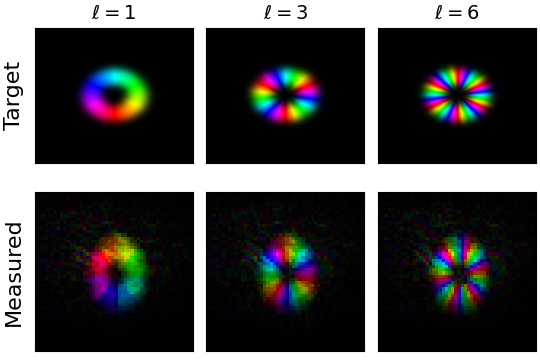

In [3]:
timestamp = '2025-11-13_10-38-54'
path = fr"G:\My Drive\Projects\DMD\Alon results\Classical\{timestamp}\ell_1.npz"
loaded_result1 = LabResults.load(path)
path = fr"G:\My Drive\Projects\DMD\Alon results\Classical\{timestamp}\ell_3.npz"
loaded_result2 = LabResults.load(path)
path = fr"G:\My Drive\Projects\DMD\Alon results\Classical\{timestamp}\ell_6.npz"
loaded_result4 = LabResults.load(path)

fig, ax = plt.subplots(2, 3, figsize=(5.4, 3.6), constrained_layout=True)
for i, res in enumerate([loaded_result1, loaded_result2, loaded_result4]):
    ax[0, i].imshow(colorize(res.target)[200:-200, 270:-270])
    ax[1, i].imshow(colorize(np.exp(-3j)*res.get_corrected_field()[10:60, 0:50], beta=0.7))
    ax[0, i].set_xticks([])
    ax[1, i].set_xticks([])
    ax[0, i].set_yticks([])
    ax[1, i].set_yticks([])

ax[0,0].set_ylabel('Target', fontsize=16)
ax[1,0].set_ylabel('Measured', fontsize=16)
ax[0,0].set_title('$\ell=1$', fontsize=14)
ax[0,1].set_title('$\ell=3$', fontsize=14)
ax[0,2].set_title('$\ell=6$', fontsize=14)
fig.savefig(r'G:\My Drive\People\Ronen\PHD\End\Lee classical.png')

# quantum Lee 

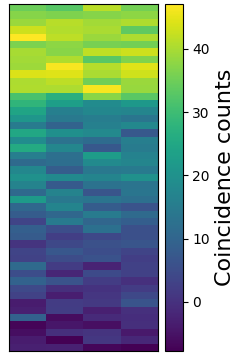

In [32]:
from pianoq_results.scan_result import ScanResult

path = r"G:\My Drive\Projects\DMD\quantum\Results\Scans\2025_09_01_13_30_53_steps_3_150_timetagger_z_12_fiber_100um_fiber_50um_260mW_f_none_before_crystal_filter_20nm.scan"

res = ScanResult()
res.loadfrom(path)

fig, ax = plt.subplots(figsize=(2.4, 3.6), constrained_layout=True)
imm = ax.imshow(res.real_coins[:, 53:].T, aspect='auto')
cax = fig.colorbar(imm, ax=ax)
cax.set_label('Coincidence counts', fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('G:\My Drive\People\Ronen\PHD\Thesis\Figures\partial_lee.png')